In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install fastbook


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [5]:
#MNIST prediction

#for this initial tutorial we are just hoing to try create a model that can classify any image
#as a 3 or a 7. So lets download a sample of MNIST that contains images of just these digits:


path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
Path.BASE_PATH = path

In [7]:
# we can see what in this directory by using ls a method added by fastai

path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [8]:
#The MNIST dataset follows a common layout for machine learning datasets:
#separate folders for the training set and the validation set
#Lets check the training set

In [9]:

(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [10]:
#There is a folder of 3s, and a folder of 7s. In machine learning parlance, we say that
#3 and 7 are the labels in this dataset. Lets take a look in one of these folders

#We use sorted here to ensure we all get the same order of files


threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [11]:
#Clearly we cna see that its full of image files
# Lets take a look at one now


im3_path = threes[1]
im3 = Image.open(im3_path)
im3

Here we are using the Image class from the PIL, which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.


In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance,heres what a section of the image look like, converted to a NumPy array:

In [12]:
array(im3)[4:, 4:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0,

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
device

device(type='cpu')

In [15]:
tensor(im3).to(device)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [16]:
#We can slice the array to pick just the part with the top of the digit in it, and
#then use a Pandas DataFrame to color-code the values using a gradient, which shows us
#clearly how the image is created from the pixel values:


im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greens')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [17]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]


len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

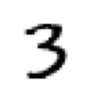

In [18]:
#We also check that one of the images looks okay. Since we now have tensors

show_image(three_tensors[1])

In [19]:
'''For every pixel position we want to compute the average over all the images o the intensity
of that pixel. To do this we first combine all the images in this list into a single three-dimesional tensor
The most common way to describe usch a tensor is to call it a rank-3 tensor. We often need to 
stack up individual tensors in a collection into a single tensor
Unsurprisingly PyTorch comes with a function called stack that we can use for this purpose

Some operations in PyTorch such as taking a mean require us to cast our integer types to float types.
Since we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of 
the type you wish to cast to and treating it as a method'''

"For every pixel position we want to compute the average over all the images o the intensity\nof that pixel. To do this we first combine all the images in this list into a single three-dimesional tensor\nThe most common way to describe usch a tensor is to call it a rank-3 tensor. We often need to \nstack up individual tensors in a collection into a single tensor\nUnsurprisingly PyTorch comes with a function called stack that we can use for this purpose\n\nSome operations in PyTorch such as taking a mean require us to cast our integer types to float types.\nSince we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of \nthe type you wish to cast to and treating it as a method"

In [20]:
#Generally when images are floats, the pixel values are expected to be between 0 and 1,
# so we will also divide by 255 here:

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_sevens.to(device)
stacked_threes.to(device)

stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

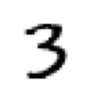

In [21]:
show_image(stacked_threes[1])

Perhaps the most important attribute of a tensor is its shape. This tells you the length of each axis. In this case we can see that we have 6131 images, each of size 28x28 pixels. There is nothing specifically about this tensor that says that the first axis is the number of images, the second is the height, and the third is the width- the semantics of a tensor are entirely up to us and how we construct it. As far as PyTorch is concerned it is just a bunch of numbers in memory



In [22]:
#The length of a tensor's shape is its rank:
len(stacked_threes.shape)

3

Imp: Rank is the number of axes or dimensions of a tensor
* shape is the size of each axis o a tensor

<Axes: >

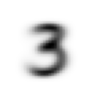

In [23]:
mean3 = stacked_threes.mean(0)
show_image(mean3)


#according to this dataset, this is the ideal number 3. You can see how its very dark where
# all the images agree it should be dark

<Axes: >

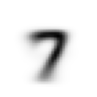

In [24]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

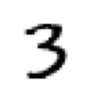

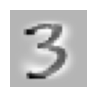

In [25]:
a_3 = stacked_threes[1]
show_image(a_3)

#The mean/blurry 3 is considered ideal representation of 3, however that might be wrong
#in our eyes

#So lets plot the difference

show_image(a_3 - mean3)  #showing the simple difference

In [26]:
dist_3_abs = (a_3 - mean3).abs().mean()  #computing mean absolute difference or L1 norm
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

#In both cases, the distance between out 3 and the ideal 3 is less than the distance to the ideal 7.
#So our simple model will give the right prediction in this case.


(tensor(0.1114), tensor(0.2021))

In [27]:
#import torch.nn.Functional as F is available by default under that name in fastai

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [28]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [29]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
arr+1

array([[2, 3, 4],
       [5, 6, 7]])

In [31]:
tns.type()

'torch.LongTensor'

In [32]:
#Since mnist provides a separate validation dataset
#We will build validation datasets out of them and store them in separate boxes

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]).float()/255 #For Nomalizing
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]).float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [33]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

#Here we use -1,-2 because that refers to the last and the second last element, in this case
#This tells pytorch to calculate mean over the last two axis

mnist_distance(a_3, mean3)

tensor(0.1114)

The above output just caculates l1 norm between the ideal sample and the arbitrary sample. However in order to calculate the l1  norms for all the samples in the dataset, we can use the BROADCASTing property of the tensor/array

In [34]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1086, 0.1092, 0.1124,  ..., 0.1368, 0.1382, 0.1187]),
 torch.Size([1010]))

In [35]:
#Now check whether a number is 3
# to do this we compare the distance between sample 3 and the ideal 3
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [36]:
is_3(a_3), is_3(a_3).float()


(tensor(True), tensor(1.))

Note that when we convert the boolean response to a float we get 1.0 for True and 0.0 for False. Thanks to broadcasting we can also test it on the full validation set of 3s

In [37]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()


accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [38]:
#We are only classifying 2 out of the 10 possible digits so far. 
#So we are going to need to do better


#To do better, perhaps it is time to try a system that does some real learning
#that is that can automatically modify itself to improve its performance
#In other words, its time to talk about the training process, and SGD.




In [39]:
'''steps involved'''

#id gradient_descent
#caption the gradient descent process
#alt graph showing the steps for gradient descent


gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

ExecutableNotFound: failed to execute Path('dot'), make sure the Graphviz executables are on your systems' PATH

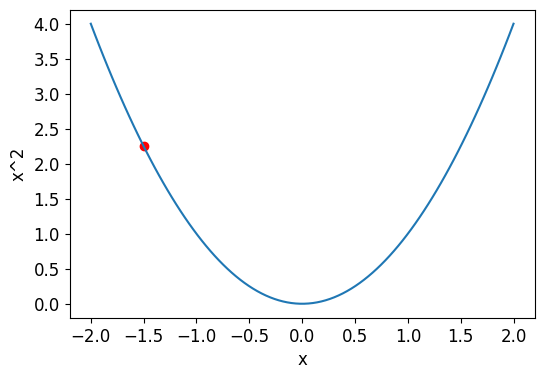

In [40]:
#take a simpler case

def f(x):
    return x**2
    
plot_function(f, 'x', 'x^2')
plt.scatter(-1.5, f(-1.5), color='red')

In [41]:
#Lets first pick a tensor value which we want gradients at

xt = tensor(3.).requires_grad_()

In [42]:
#now we calculate our function with that value. Notice how Pytorch prints not just the value
#calculated but also a not that it has a gradient functionit will be using to calculate our gradients when needed


yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [43]:
#Finally we tell pytorch to calculate the gradients for us
yt.backward()

In [44]:
xt.grad

tensor(6.)

Derivative of $x^2$ is $2x$ hence value of the derivative of yt is 6 ie $2x3$

In [45]:
#lets check with a tensor

xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [46]:
#And we will add sum to our function so it can take a vecor and return a scalar

def f(x):
    return(x**2).sum()


yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [47]:
yt.backward()
xt.grad



tensor([ 6.,  8., 20.])

The gradients only tell us the slope of out function, they dont actually twll us exactly how far to adjust the parameters

In [48]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

Stepping With a Learning Rate

In [49]:
#An end to end sgd example

In [50]:
#Generate time scale(ie over 20 seconds scale)


time = torch.arange(0,20).float().to(device) ; time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

What we did here is we created speed as a dependent variable of time
* speed follows the time dependent function of a*(time**2) + (b*time) + c

* The torch.randn(20)*3 adds a certain amount of random noise to the function

In [51]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

(-0.9500000000000001, 19.95, -4.6393995761871345, 78.23527722358703)

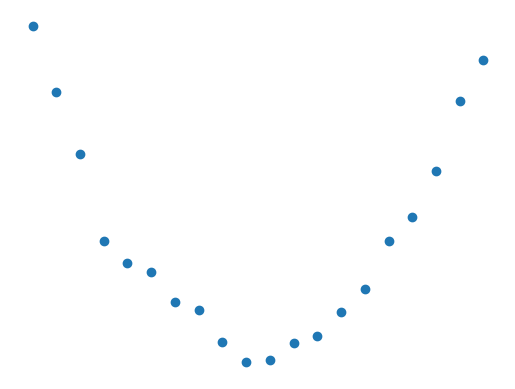

In [52]:
speed = torch.randn(20)*3 + 0.75*(time.to('cpu')-9.5)**2 + 1
plt.scatter(time.cpu(), speed.cpu())
plt.axis('off')



In [53]:
speed = speed.to(device)

In [54]:
#We want to distingush clearly betweenthe function's input and its parmeters.
# So lets collect the parameters in one argument and thus separate the input,t, and the parameters,

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [55]:
#Also lets define a loss function

def mse(preds, targets):
    return ((preds - targets)**2).mean()

## Initialize the parameters

In [56]:
params = torch.randn(3)
params.requires_grad = True
#params = params.to(device)  #params are negative

In [57]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [58]:
#save the original parameters
orig_params = params.clone()
orig_params

tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward0>)

## Calculate the predictions

In [59]:
preds = f(time, params)
preds = preds.to('cpu')

## Create a plot function to plot the predictions vs the function

In [60]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time.cpu(), speed.cpu())
    ax.scatter(time.cpu(), to_np(preds.cpu()), color='red')
    ax.axis('off')

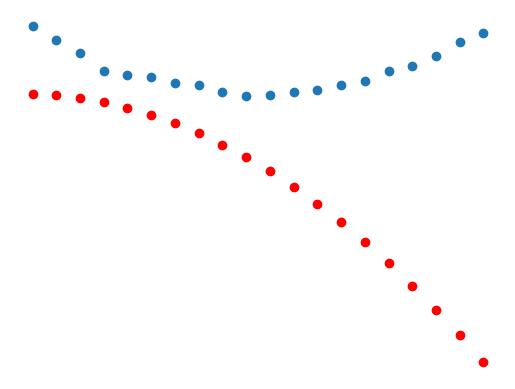

In [61]:
show_preds(preds)
#Not very good at prediction 

Initialize the loss function

In [62]:
#individual loss metrics

loss = [i for i in map(mse, speed,preds)]
loss_orig = loss.copy()

In [63]:
#calculating the loss
loss = mse(preds, speed.to('cpu'))
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

## Calculate the gradients

In [64]:
loss.backward()

In [65]:
params.is_leaf

True

In [66]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [67]:
params.grad * 1e-5 #we pick a learning rate of 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [68]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

Step the weights

In [69]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [70]:
params  #hence the parameters are updated

tensor([-0.2339, -0.7164,  1.3551], requires_grad=True)

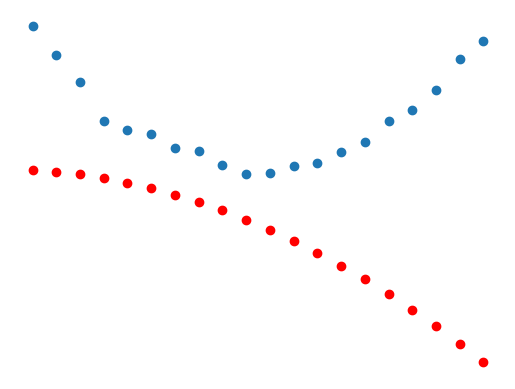

In [71]:
preds = f(time, params)
mse(preds, speed)

#loss has decreased significantly

show_preds(preds)

We need to repeat this a few times, so we will create a function to apply one step

In [72]:
def apply_step(params, prn=True):
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= params.grad.data * 1e-5
    params.grad = None
    if prn: print(loss.item())
    return preds

Now repeat the process

In [73]:
for i in range(10):
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


To see how the loss goes down and the predition improves

In [74]:
params = orig_params.detach().requires_grad_()

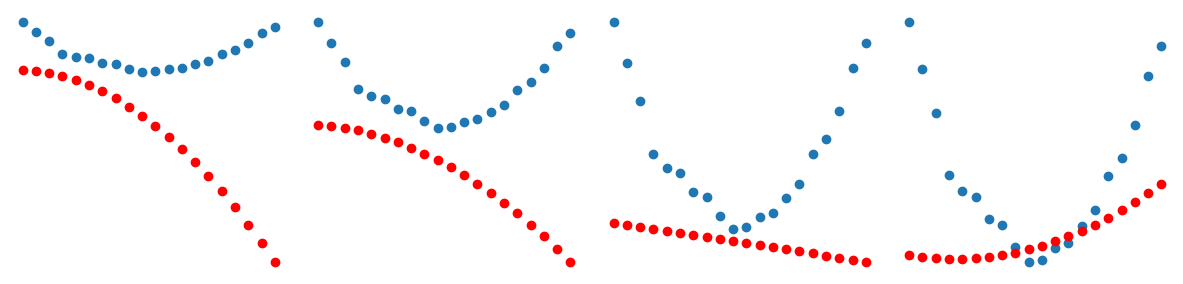

In [75]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [76]:
#At first we will concatenate the tensors into one single tensor

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)


In [77]:
#We need label for each imge, we will use 1 for 3s and 0 for 7s

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape, train_y.shape

(torch.Size([12396, 1]), torch.Size([12396, 1]))

A Dataset in PyTorch is required to return a tuple of (x,y) when indexed. Python provides a zip function which, when combined with list, provides a simple way to get 
this functionality

In [78]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [79]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

Now we need an initial weight for every pixel 

In [80]:
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

In [81]:
weights = init_params((28*28,1))
#random weights initialized for each pixel

The function weights*pixels wont be flexible enough it always equal to 0 when the 
pixels are equal to 0. You might remember from high school math that the formula for a ine is y = w*x + b; we still need the b. We will initialize it to a random number too:


In [82]:
bias = init_params(1)
bias

tensor([0.6863], requires_grad=True)

In [83]:
(train_x[0] * weights.T).sum() + bias
#Here we are transposing the weights because we need match the shape of both the vectors
#and hence create a set which is y ie = wx +b

tensor([20.2336], grad_fn=<AddBackward0>)

In [84]:
def linear1(xb):
    return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [85]:
#Now lets check the accuracy

corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [86]:
corrects.float().mean().item()

0.4912068545818329

Lets see what the change in accuracy is for a small change in one fo the weights.
* note that we have to ask PyTorch not to calculate gradients as we do this
* which is what with torch.no_grad() is doing here

In [87]:
with torch.no_grad():
    print(weights[0])
    weights[0] *= 1.001
    print(weights[0])



tensor([1.3123], requires_grad=True)
tensor([1.3136], requires_grad=True)


In [88]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

So not so significant difference between previous accuracy and the accuracy after the weights were modified, because accuracy is constant and not a function whereas a loss function will have  a derivative and hence we can identify the direction of the slope of the loss function when when weights are slightly modified

* THAT IS WHY LOSS FUNCTION INSTEAD OF ACCURACY IS USED

For instance-->> Suppose that our model has three images which we knew were 3, a 7 and a 3
hence the 100% accuracy will be [1,0,1],
* but if we take into probability; the model predicted with confidence of [0.9, 0.4, 0.2]
* so the loss is [0.1, -0.6, 0.8]
* if we change the weights and then predict the probabilities we can see changes in the loss
* thus we obtain a direction of where the loss is heading to




In [89]:
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4,0.2])

Here's a first try at a loss function that measures the distance between predictions and targets:

In [90]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()



This torch.where(a,b,c) works as [b[i] if a[i] else c[i] for i in range(len(a))]
* torch.where(condition, x, y) returns x when the condition satisfies else returns y

In [91]:
torch.where(trgts==1,1-prds, prds)

#clearly the function return a lower number when predictions are more accurate, when accurate predictions are more confident

mnist_loss(prds, trgts)

tensor(0.4333)

If we change the prediction for othe one false target frm 0.2 to 0.8 the loss
will go down



In [92]:
prds = torch.tensor([0.9, 0.4,0.8])
prds



tensor([0.9000, 0.4000, 0.8000])

In [93]:
#calculate the loss
mnist_loss(prds, trgts)

tensor(0.2333)

One problem with mnist_loss as currently defined is that it assumes that predictions are always between 0 and 1. We need to ensure then that this is acually the case

In [94]:
#Sigmoid function ensures the outputs are a number between 0 and 1

def sigmoid(x):
    return 1/(1+ torch.exp(-x))

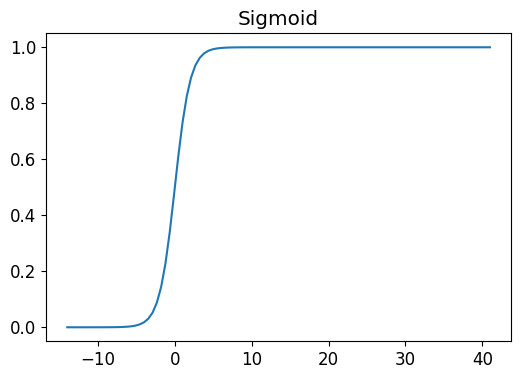

In [95]:
#Pytorch has a dedicated sigmoid function
plot_function(torch.sigmoid, title='Sigmoid', min=-14, max=41)

In [117]:
#lets update mnist_loss to use the sigmoid function

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [118]:
mnist_loss(prds, trgts)

tensor(0.3993)

The selected text explains the difference between a loss function and a metric in the context of machine learning. A loss function is used to drive automated learning by providing a meaningful derivative that can be optimized using its gradient. It must be reasonably smooth and respond to small changes in confidence level. On the other hand, metrics are the numbers that we really care about and are used to judge the performance of a model. They are printed at the end of each epoch and provide insight into how well our model is doing. The key difference between the two is that the loss function is used to drive automated learning while metrics are used to drive human understanding.

A Dataloader can take any Python collection and turn it into an iterator over mini-batches, like so

In [119]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)   


#Dataloader shuffles the data and creates batches of 5 elements from the dataset

[tensor([ 3,  2, 10,  9, 13]),
 tensor([14,  6,  8,  0,  1]),
 tensor([ 7,  4,  5, 12, 11])]

In [120]:
#For training a model we want a collection containing independent and dependent variables. A collection
#that contains tuples of independent and dependent variables is known in PyTOrch as a Dataset

In [121]:
ds = L(enumerate(string.ascii_lowercase))

In [122]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [123]:
#lets pass this to the data loader
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 3, 16, 17,  8,  7,  2]), ('d', 'q', 'r', 'i', 'h', 'c')),
 (tensor([10, 22,  4, 14, 25, 15]), ('k', 'w', 'e', 'o', 'z', 'p')),
 (tensor([ 1, 12, 19,  5,  9, 11]), ('b', 'm', 't', 'f', 'j', 'l')),
 (tensor([ 0, 23, 21, 13, 18, 20]), ('a', 'x', 'v', 'n', 's', 'u')),
 (tensor([ 6, 24]), ('g', 'y'))]

In [124]:
weights = init_params((28*28,1))
bias = init_params(1)

In [125]:
#A DataLoader can be created from a Dataset

dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [126]:
#we will do the same for the validation set

valid_dl = DataLoader(valid_dset, batch_size=256)

In [127]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [128]:
preds = linear1(batch)

In [129]:
preds

tensor([[ 6.8574],
        [12.7238],
        [ 6.2495],
        [-1.4234]], grad_fn=<AddBackward0>)

In [130]:
#calculate the loss
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2022, grad_fn=<MeanBackward0>)

In [131]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0070), tensor([-0.0399]))

In [132]:
#Now lets put that all in a function

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [133]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0140), tensor([-0.0797]))

In [134]:
#What happens if we call the above functino again

calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

#So the gradients have changed and we dont want that
#That why we do torch.zero_grad()

(tensor(-0.0210), tensor([-0.1196]))

In [135]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

Methods in PyTorch whose names end in an underscore modify their objects in place. For instance, bias.zero_() sets all elements of the tensor bias to 0.

In [146]:
#Our only remaining step is to update the weights and biases based on the gradient
#and learnign rate

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [147]:
#Function to calculate our validation accuracy

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [148]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.7500)

In [149]:
#And then put the batches together

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [150]:
validate_epoch(linear1)

0.8052

That's our starting point, Let's train for one epoch, and see if the accuracy improves

In [151]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8392

In [152]:
#Then we will do it a few more times

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9041 0.9295 0.9393 0.9476 0.9525 0.9569 0.9593 0.9622 0.9647 0.9657 0.9662 0.9671 0.9667 0.9676 0.9686 0.9696 0.9701 0.9701 0.9706 0.9701 

Our next step will be to create an object that will handle the SGD step for us, In PyTorch its called optimizer

## Optimizer

In [153]:
linear_model = nn.Linear(28*28,1)
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [154]:
#Every PyTorch module knows what parameters it has that can be trained; they are available
#through the parameters method

In [155]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [156]:
#We can use this information to create an optimizer

class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [157]:
opt = BasicOptim(linear_model.parameters(), lr)

In [158]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [168]:
import inspect
lines = inspect.getsource(calc_grad)
print(lines)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()



In [160]:
#Our validation function doesnt need to change at all:

validate_epoch(linear_model)

0.5897

In [163]:
#Lets put our little training loop in a function, to make things simpler


def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [164]:
train_model(linear_model, 20)

0.4932 0.8496 0.8384 0.9131 0.9346 0.9487 0.9565 0.9629 0.9663 0.9683 0.9697 0.9717 0.9736 0.9751 0.9756 0.9766 0.9775 0.9775 0.978 0.9785 

In [170]:
print(inspect.getsource(mnist_loss))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()



In [172]:
# Now by using the SGD optimizer

linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.9008 0.813 0.9072 0.9307 0.9453 0.9546 0.9624 0.9653 0.9678 0.9692 0.9712 0.9726 0.9746 0.9761 0.9766 0.978 0.9785 0.9785 0.9785 

fastai also provides Learner.fit which we can use instead of train_model. To create a Learner we first need to create a DataLoaders, by passing in our training and validation
DataLoader

In [173]:
dls = DataLoaders(dl, valid_dl)

To create a Learner without using an application such as vision_learner we need to pass inall the elements that we have created in this chaper the DatLoaders the model the optimizaion function the loss and optinally any metrics to print

In [176]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [177]:
#And now we can call fit

learn.fit(10, lr=lr)

In [178]:
#As you can see theres nothing magic about the pytorch and fastai classes. They are just
#convenient pre-packaged pieces that make your life a bit easier

Adding a Nonlinearity

In [179]:
#A linear classifier is very constrained in terms of what it can do. To make it a bit more complex
#we need to add something nonlinear between two linear classifiers this is what gives us a neural network

In [180]:
#Here is the entire definition of a basic neural network


def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [181]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)


In [183]:
'''J: There is an enormous amount of jargon in deep learning, 
including terms like rectified linear unit. The vast vast majority of this jargon 
is no more complicated than can be implemented in a short line of code, as we saw 
in this example. The reality is that for academics to get their papers published they 
need to make them sound as impressive and sophisticated as possible. One of the ways 
that they do that is to introduce jargon. Unfortunately, this has the result that the 
field ends up becoming far more intimidating and difficult to get into than it should be. 
You do have to learn the jargon, because otherwise papers and tutorials are not going 
to mean much to you. But that doesn't mean you have to find the jargon intimidating. Just
remember, when you come across a word or phrase that you haven't seen before, 
it will almost certainly turn out to be referring to a very simple concept.'''

"J: There is an enormous amount of jargon in deep learning, \nincluding terms like rectified linear unit. The vast vast majority of this jargon \nis no more complicated than can be implemented in a short line of code, as we saw \nin this example. The reality is that for academics to get their papers published they \nneed to make them sound as impressive and sophisticated as possible. One of the ways \nthat they do that is to introduce jargon. Unfortunately, this has the result that the \nfield ends up becoming far more intimidating and difficult to get into than it should be. \nYou do have to learn the jargon, because otherwise papers and tutorials are not going \nto mean much to you. But that doesn't mean you have to find the jargon intimidating. Just\nremember, when you come across a word or phrase that you haven't seen before, \nit will almost certainly turn out to be referring to a very simple concept."

In [184]:
#Just like the simple net we designed previously we can do using pytorch

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [185]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [187]:
#hide_output

learn.fit(10, 0.1)

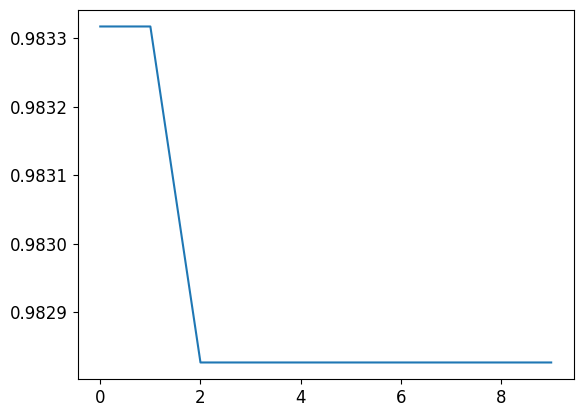

In [188]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [189]:
learn.recorder.values[-1][2]

0.982826292514801

In [191]:
#Here is what happens when we train an 18 laeyer model using the same approach we saw before

dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet152, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)

learn.fit_one_cycle(1,0.1)

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


KeyboardInterrupt: 